# 1.5 ANN Model

## This script contains the following:

### 1. Importing your libraries and data
### 2. Preprocessing data frames
### 3. Split data into training and test sets
### 4. Run ANN model 

## 01. Importing your libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [4]:
# Import the scaled dataset
scaled = pd.read_pickle(os.path.join(path, '02 Data Sets', 'ClimateWin_Scaled.pkl'))
scaled.head(5)

,DATE,MONTH,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,-1.731975,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,-1.731824,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,-1.731673,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.731523,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,-1.731372,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [5]:
# Import the unscaled dataset
unscaled = pd.read_csv(os.path.join(path, '02 Data Sets','Dataset-weather-prediction-dataset-processed.csv'))
unscaled.head(5)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [6]:
pleasant = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.head(5)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 02. Preprocessing data frames

In [7]:
# listing the location names from scaled dataset
locations_A = list({x.split("_")[0] for x in scaled.columns if x not in ["MONTH", "DATE"]})
locations_A.sort()
locations_A

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA',
 'id']

In [8]:
# listing the location names from df_y
locations_B = list({x.split("_")[0] for x in pleasant.columns if x not in ["MONTH", "DATE"]})
locations_B.sort()
locations_B

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [9]:
# finding the cities existing only in locations_A, not in locations_B
noname = [i for i in locations_A if i not in locations_B]
noname

['GDANSK', 'ROMA', 'TOURS', 'id']

In [10]:
# delete columns that the city name is in noname list ['GDANSK', 'ROMA', 'TOURS'. 'id']
for col in scaled.columns:
    if col.split('_')[0] in noname:
        scaled.drop(columns=col, inplace=True)

In [11]:
# listing the location names from unscaled dataset
locations_C = list({x.split("_")[0] for x in unscaled.columns if x not in ["MONTH", "DATE"]})
locations_C.sort()
locations_C

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA']

In [12]:
# finding the cities existing only in locations_C, not in locations_B
noname_1 = [i for i in locations_C if i not in locations_B]
noname_1

['GDANSK', 'ROMA', 'TOURS']

In [13]:
# delete columns that the city name is in noname_1 list ['GDANSK', 'ROMA', 'TOURS']
for col in unscaled.columns:
    if col.split('_')[0] in noname_1:
        unscaled.drop(columns=col, inplace=True)

## 03. Split data into training and test sets

In [14]:
#Create an 'X' matrix by dropping the unneeded columns.
X = unscaled.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [15]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [16]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [18]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,13.6,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,-3.2,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,-6.0,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,-3.8,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,1.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,10.6,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,-0.5,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,-7.4,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,11.2,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,9.9,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


In [19]:
# Scaling the data
scaler = StandardScaler()

# Fit the train data
scaler.fit(X_train)

# Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [20]:
# Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Quinn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

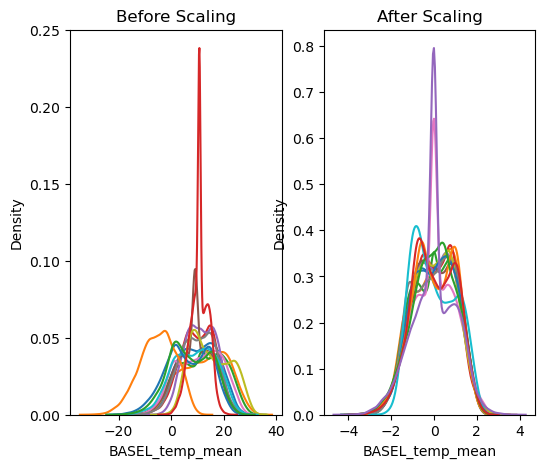

In [21]:
# Show scaling differences.Only retrieve the mean_tempt data due to large dataset

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BELGRADE_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_temp_mean'], ax=ax1)
sns.kdeplot(X_train['DEBILT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['HEATHROW_temp_mean'], ax=ax1)
sns.kdeplot(X_train['KASSEL_temp_mean'], ax=ax1)
sns.kdeplot(X_train['LJUBLJANA_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MAASTRICHT_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(X_train['MUNCHENB_temp_mean'], ax=ax1)
sns.kdeplot(X_train['OSLO_temp_mean'], ax=ax1)
sns.kdeplot(X_train['SONNBLICK_temp_mean'], ax=ax1)
sns.kdeplot(X_train['STOCKHOLM_temp_mean'], ax=ax1)
sns.kdeplot(X_train['VALENTIA_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BELGRADE_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DEBILT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DUSSELDORF_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['HEATHROW_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['KASSEL_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['LJUBLJANA_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MAASTRICHT_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['MUNCHENB_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['OSLO_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['SONNBLICK_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['STOCKHOLM_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['VALENTIA_temp_mean'], ax=ax2)

plt.show()

#### After scaling, the distribution seems closer to normal, except the outlier of SONNBLICK. This proves that scaled data is prefered in this situation.

## 04. Run ANN model on scaled dataset

In [22]:
# Add new library
from sklearn.multioutput import MultiOutputClassifier

In [23]:
# Create an 'X' matrix
X = scaled.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [24]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [25]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


### 4.1 ANN Model 1

In [27]:
# Create the ANN with two hidden layers (10,5)
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

#### The ANN Model 1 has not yet converged on an answer. Let's see how accurate it is.

In [28]:
#Training accuracy score

y_pred = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.5280618173367418
Test accuracy score  0.5270128964796096


In [29]:
#Let's see accuracy score of each station
locations = list({x.split("_")[0] for x in scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [30]:
location_accuracies = {}
for count, location in enumerate(locations):
    key = f"{location}_pleasant_weather"
    loc_accuracy = accuracy_score(y_test[key], y_pred_test[:, count])
    location_accuracies[location] = loc_accuracy
    print(f'Accuracy for {location}: {loc_accuracy}')

Accuracy for BASEL: 0.9147786685256187
Accuracy for BELGRADE: 0.9306378529104218
Accuracy for BUDAPEST: 0.8868943882886023
Accuracy for DEBILT: 0.9210526315789473
Accuracy for DUSSELDORF: 0.9477169745555943
Accuracy for HEATHROW: 0.853607528755664
Accuracy for KASSEL: 0.9037992331822935
Accuracy for LJUBLJANA: 0.874869292436389
Accuracy for MAASTRICHT: 0.945625653537818
Accuracy for MADRID: 0.9862321366329732
Accuracy for MUNCHENB: 0.9123387940048797
Accuracy for OSLO: 0.9217497385848727
Accuracy for SONNBLICK: 1.0
Accuracy for STOCKHOLM: 0.9022307424189613
Accuracy for VALENTIA: 0.952073893342628


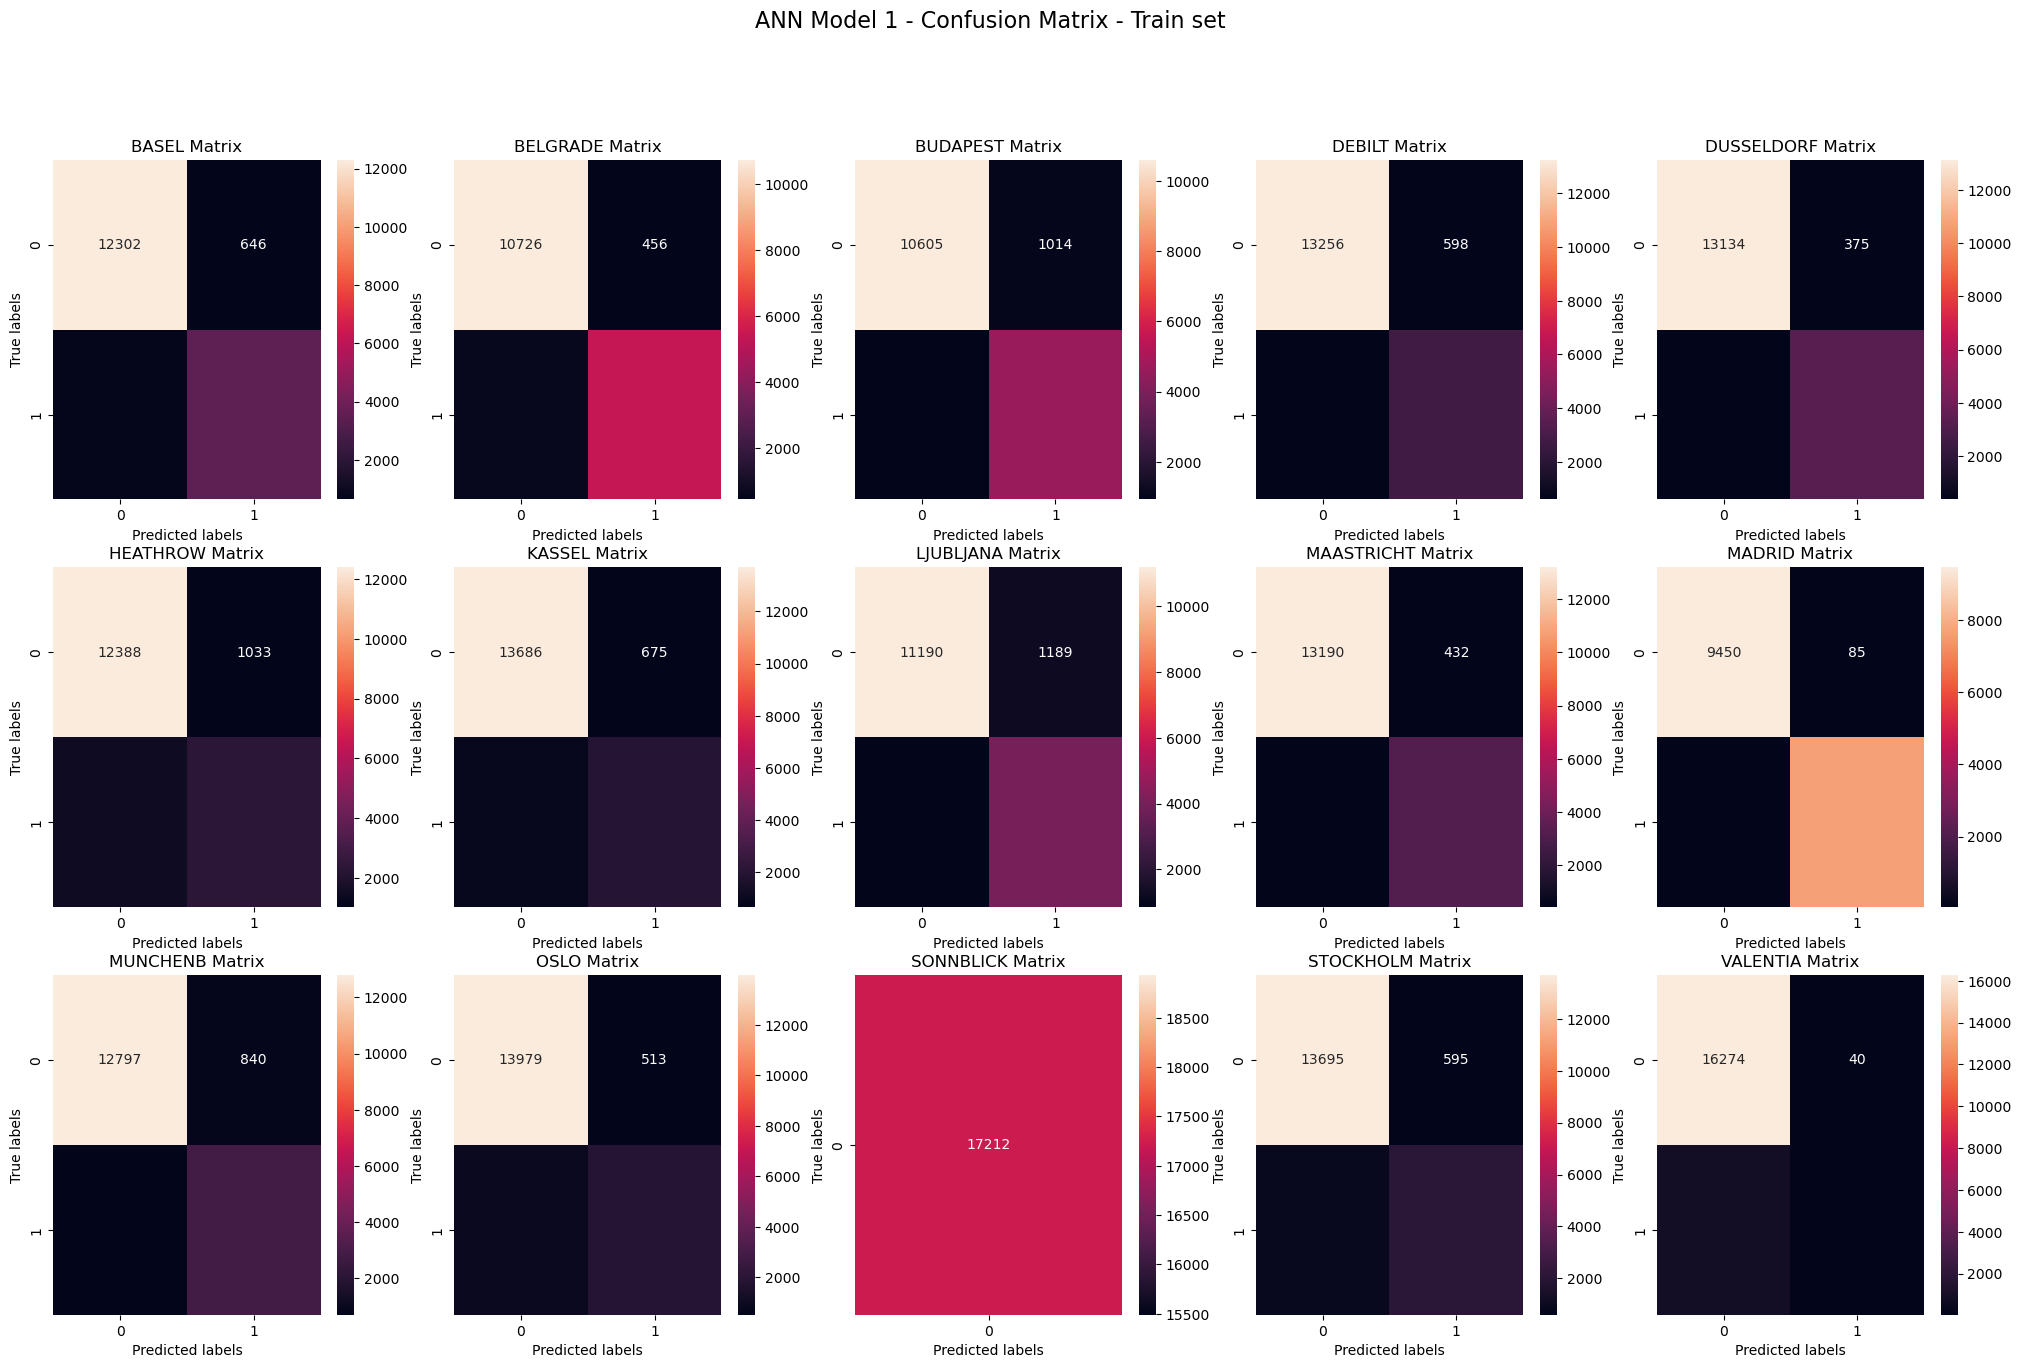

In [31]:
# Plot Confusion Matrices for Train Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']  
figure.suptitle('ANN Model 1 - Confusion Matrix - Train set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1


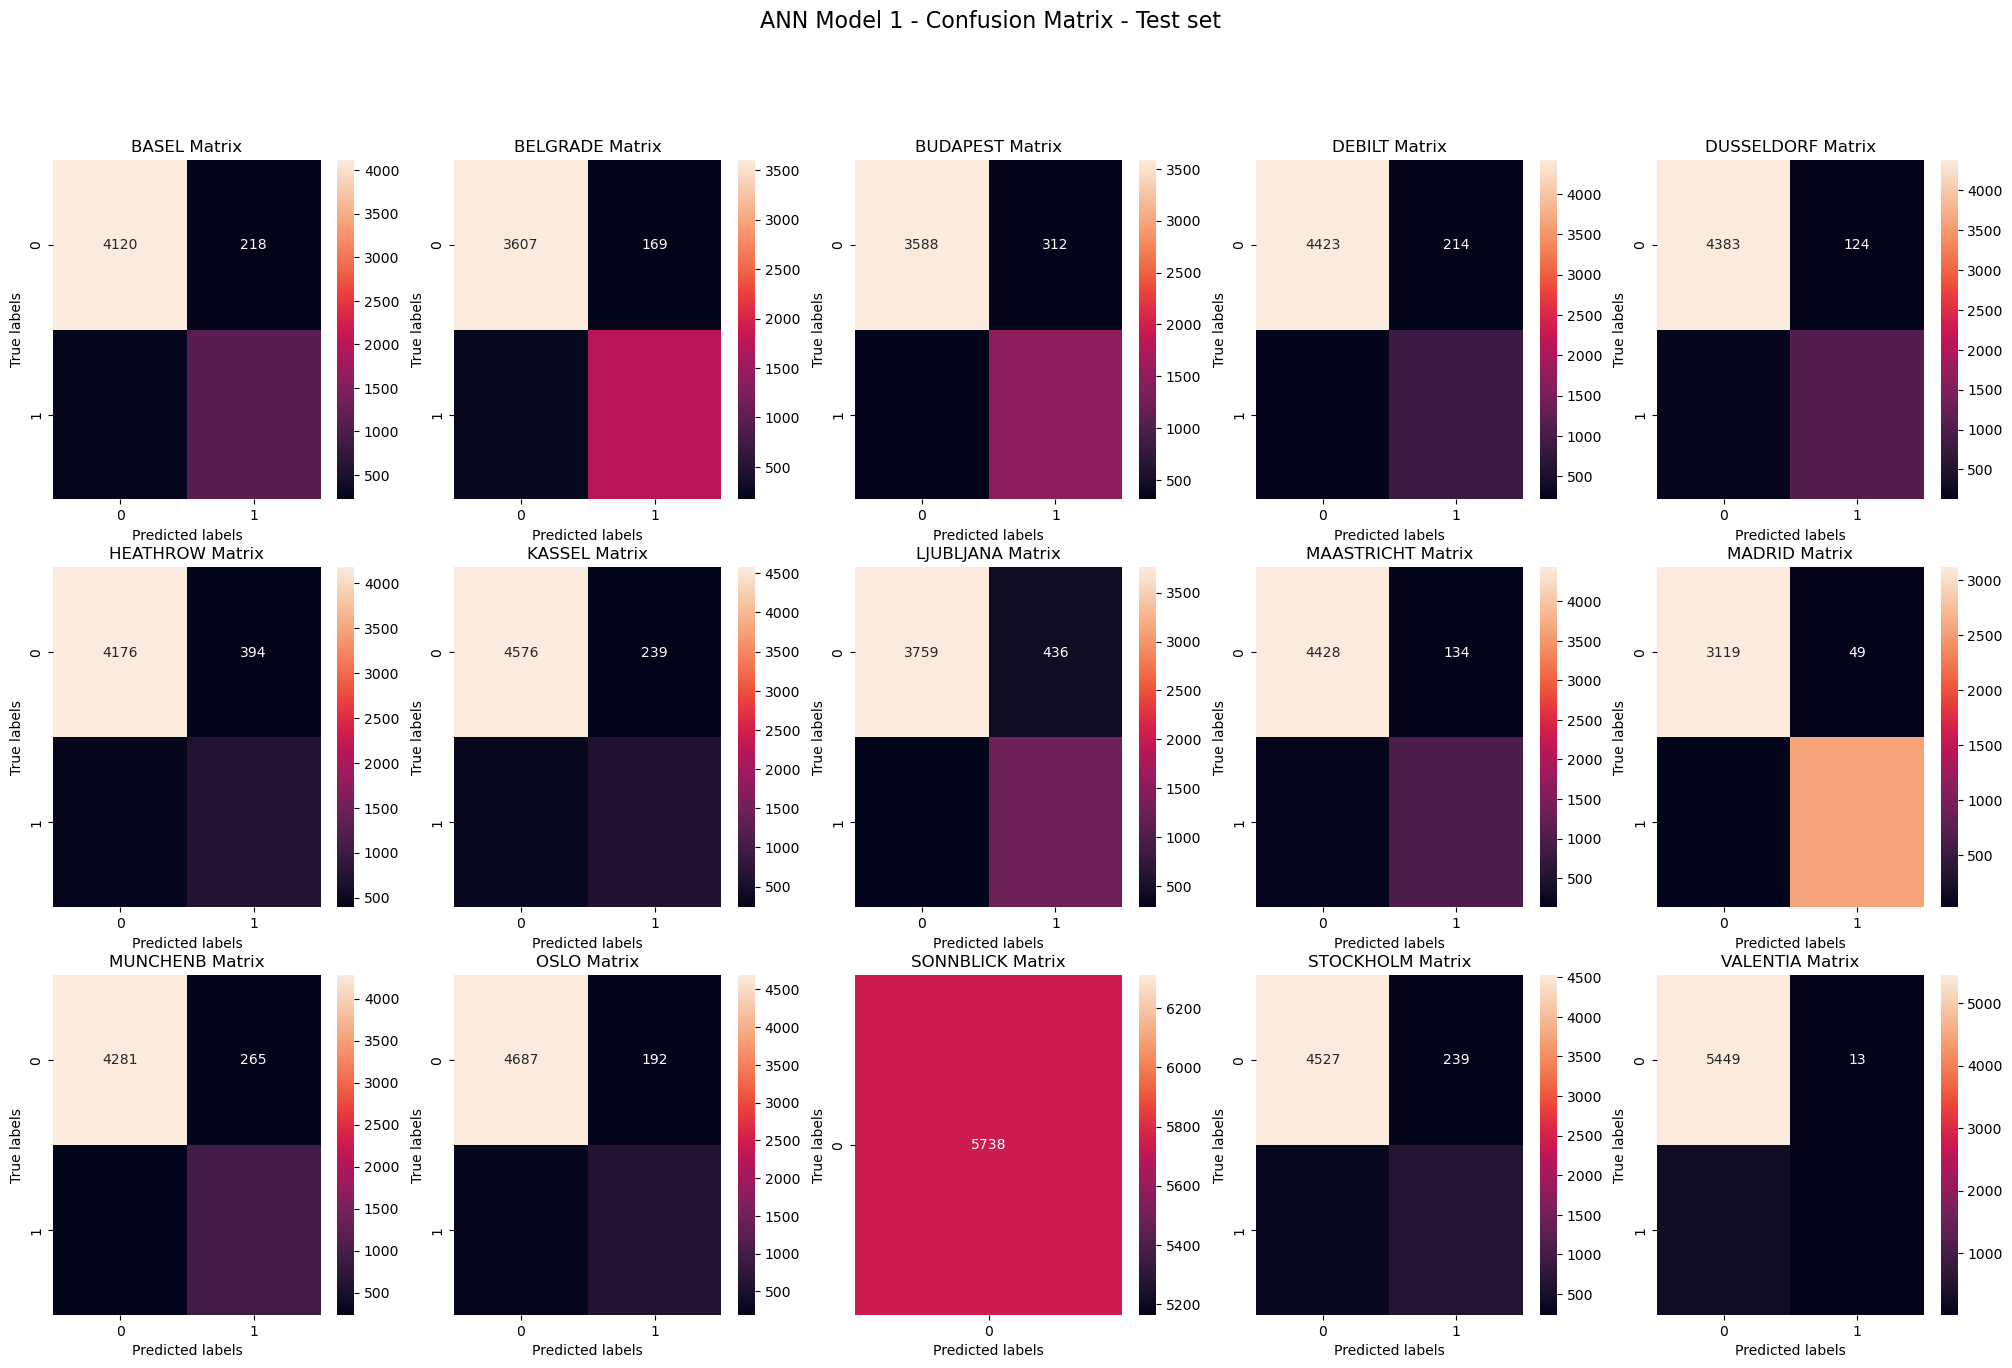

In [32]:
# Plot Confusion Matrices for Test Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant'] 
figure.suptitle('ANN Model 1 - Confusion Matrix - Test set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 4.2 ANN Model 2

In [33]:
# Create the ANN with two hidden layers (20,10)
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500, tol=0.0001) #Increase nodes
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=500)

#### The ANN Model 2 has not yet converged on an answer either.

In [34]:
# Accuracy score
y_pred = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.6474552637694632
Test accuracy score  0.6258278145695364


#### The accuracy score increases but the model has not converged. 

In [35]:
location_accuracies = {}
for count, location in enumerate(locations):
    key = f"{location}_pleasant_weather"
    loc_accuracy = accuracy_score(y_test[key], y_pred_test[:, count])
    location_accuracies[location] = loc_accuracy
    print(f'Accuracy for {location}: {loc_accuracy}')

Accuracy for BASEL: 0.9712443360055768
Accuracy for BELGRADE: 0.9775182990589055
Accuracy for BUDAPEST: 0.8766120599512025
Accuracy for DEBILT: 0.9229696758452423
Accuracy for DUSSELDORF: 0.9503311258278145
Accuracy for HEATHROW: 0.951551063088184
Accuracy for KASSEL: 0.9742070407807598
Accuracy for LJUBLJANA: 0.9532938306029975
Accuracy for MAASTRICHT: 0.9543394911118857
Accuracy for MADRID: 0.9783896828163123
Accuracy for MUNCHENB: 0.9768211920529801
Accuracy for OSLO: 0.9400487974904148
Accuracy for SONNBLICK: 1.0
Accuracy for STOCKHOLM: 0.9764726385500174
Accuracy for VALENTIA: 0.9639247124433601


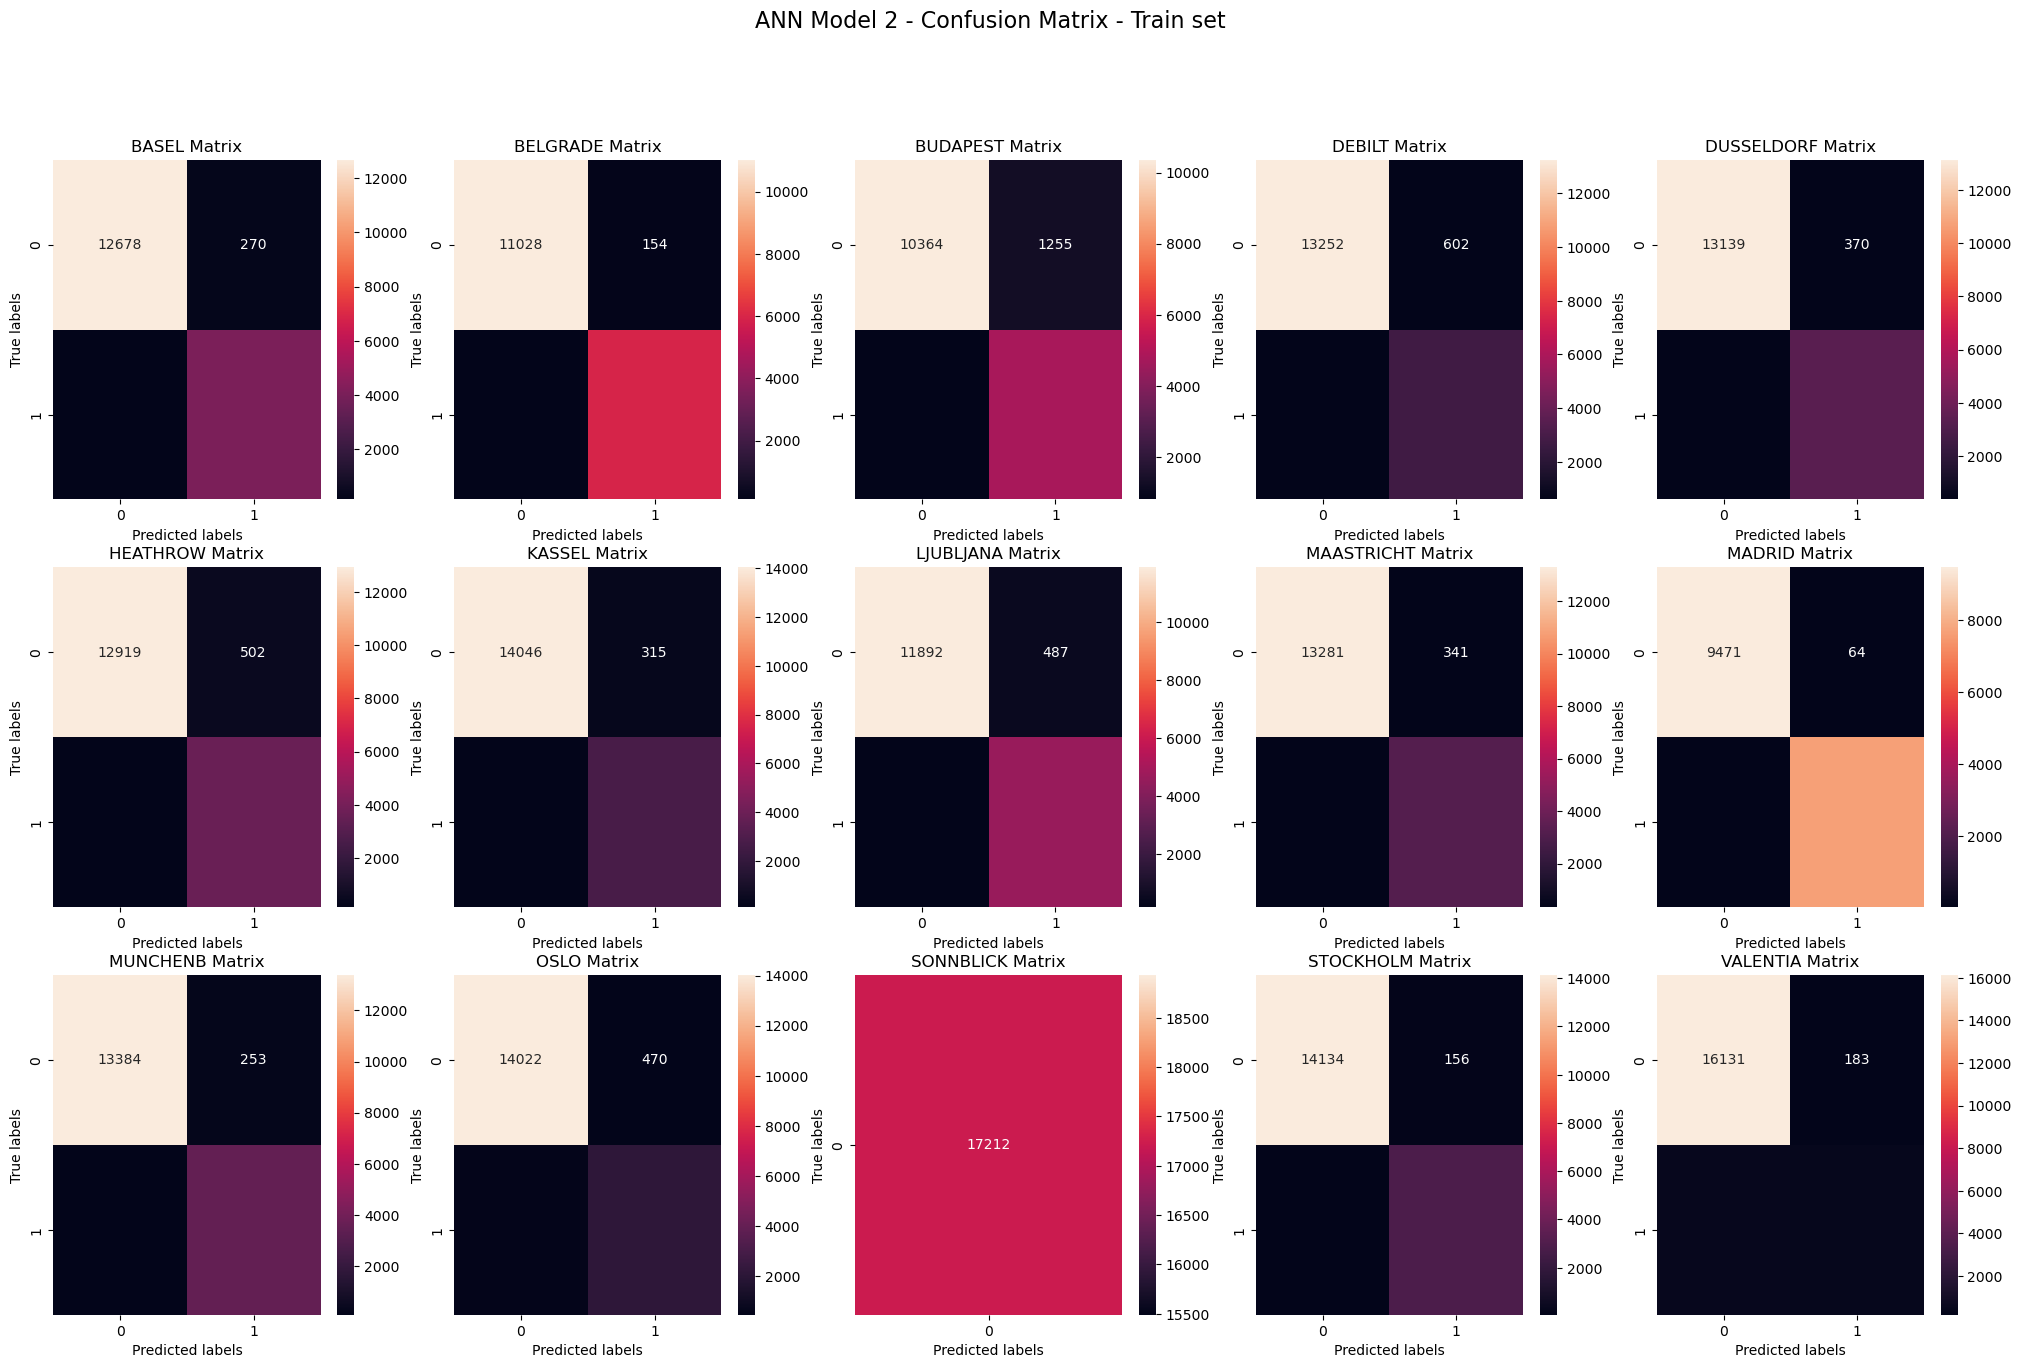

In [36]:
# Plot Confusion Matrices for Train Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']  
figure.suptitle('ANN Model 2 - Confusion Matrix - Train set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1


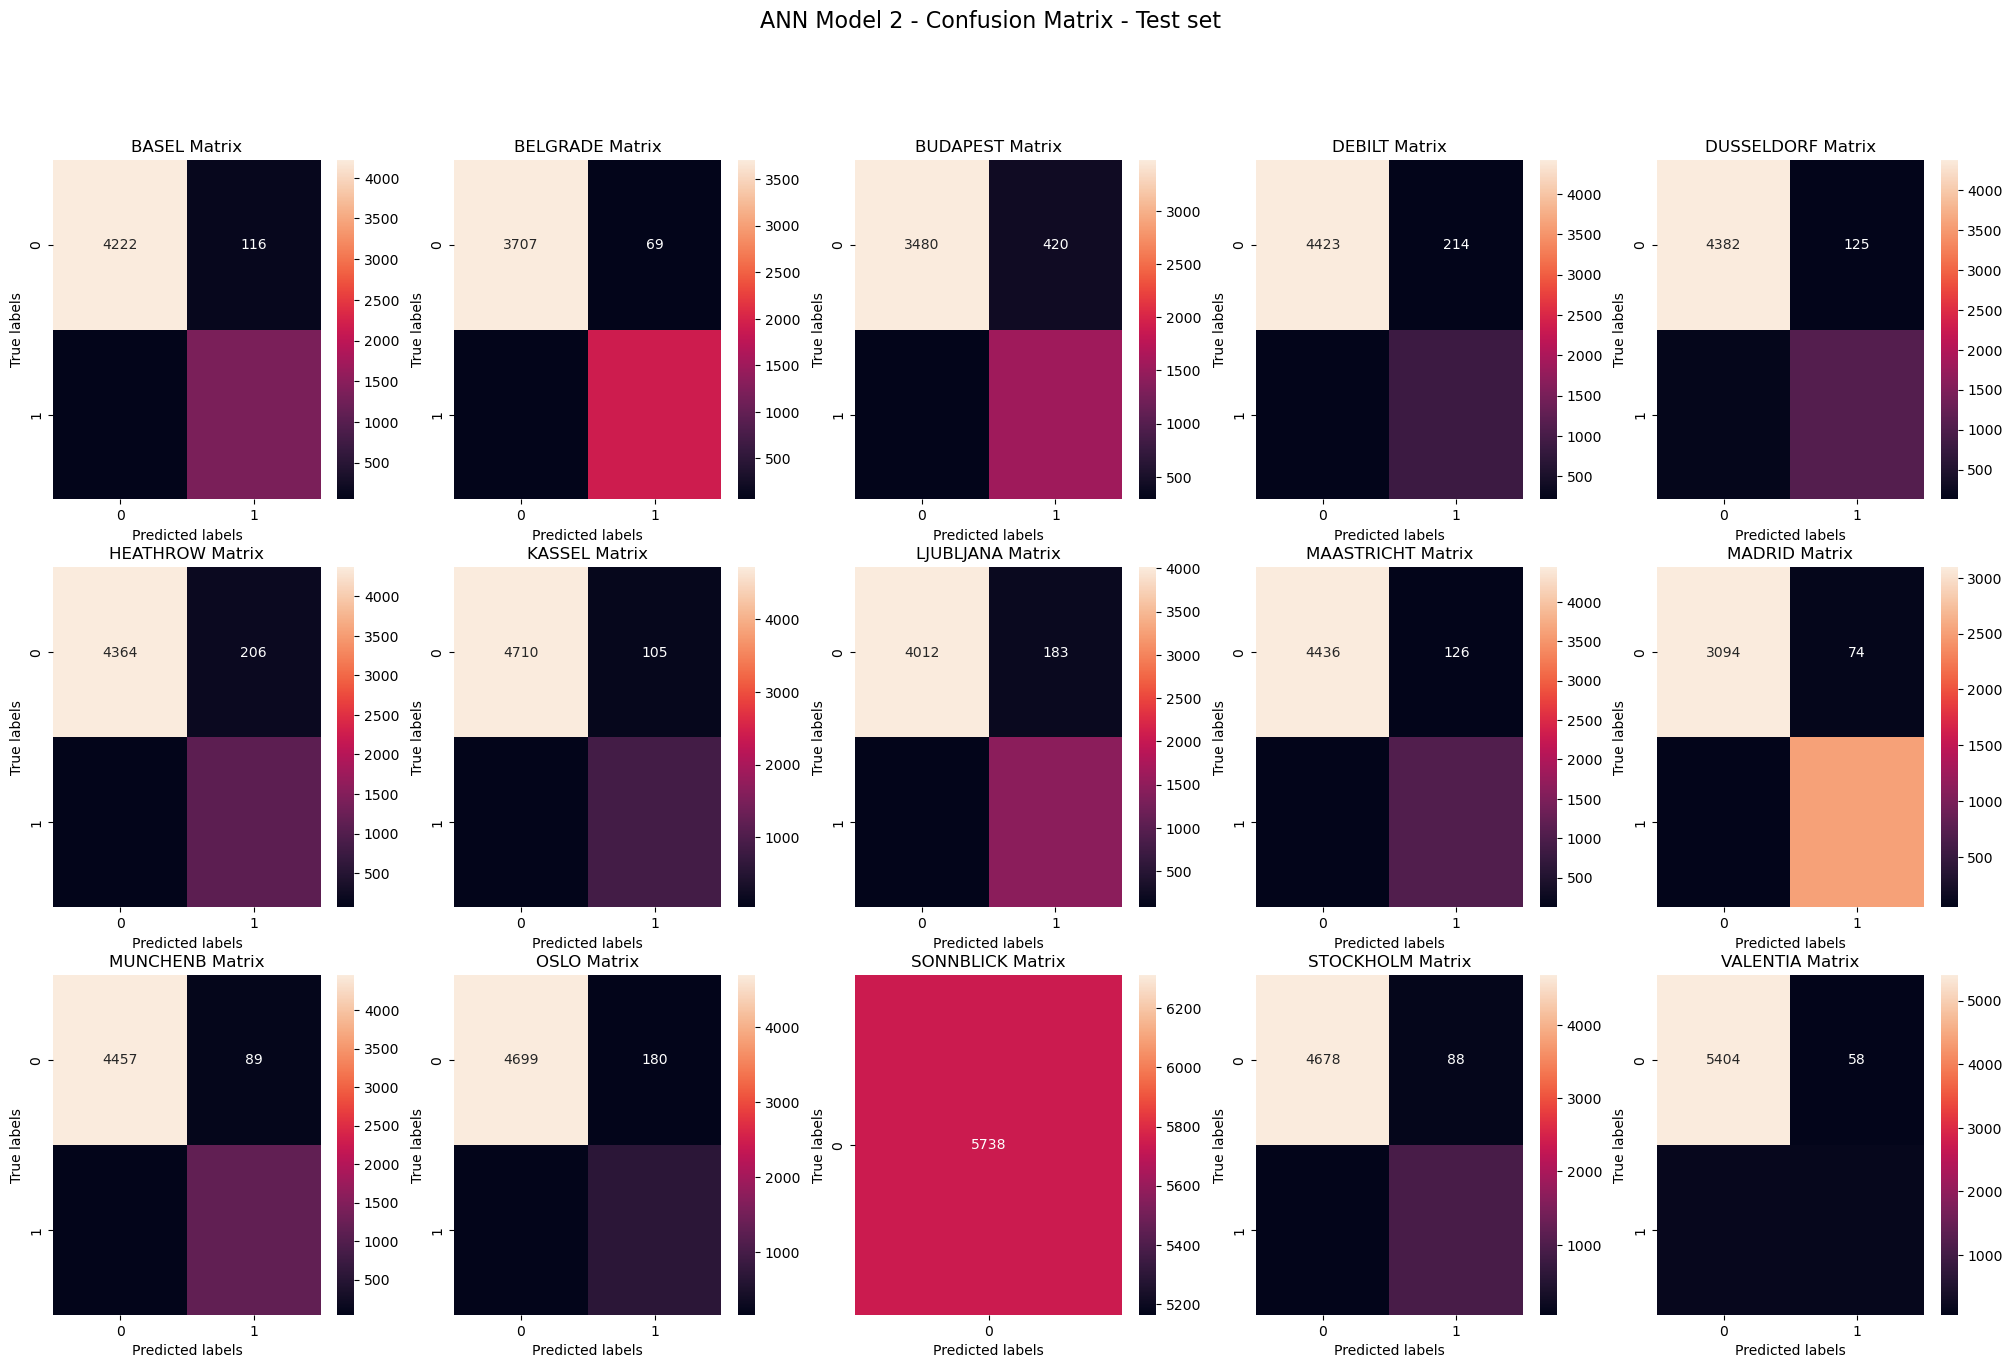

In [37]:
# Plot Confusion Matrices for Test Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant'] 
figure.suptitle('ANN Model 2 - Confusion Matrix - Test set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 4.3 ANN Model 3

In [38]:
# Create the ANN with three hidden layers (20,10,10)
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001) #Increase hidden layers and iterations
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

#### The model finally converged

In [39]:
# Accuracy score
y_pred = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.6411224726934697
Test accuracy score  0.615719762983618


#### However, we don't see the improvement in accuracy score

In [40]:
location_accuracies = {}
for count, location in enumerate(locations):
    key = f"{location}_pleasant_weather"
    loc_accuracy = accuracy_score(y_test[key], y_pred_test[:, count])
    location_accuracies[location] = loc_accuracy
    print(f'Accuracy for {location}: {loc_accuracy}')

Accuracy for BASEL: 0.9573021958870687
Accuracy for BELGRADE: 0.979261066573719
Accuracy for BUDAPEST: 0.9620076681770652
Accuracy for DEBILT: 0.929766469153015
Accuracy for DUSSELDORF: 0.9491111885674451
Accuracy for HEATHROW: 0.9409201812478215
Accuracy for KASSEL: 0.9325548971767166
Accuracy for LJUBLJANA: 0.9435343325200418
Accuracy for MAASTRICHT: 0.9491111885674451
Accuracy for MADRID: 0.9879749041477867
Accuracy for MUNCHENB: 0.9616591146741025
Accuracy for OSLO: 0.9245381666085745
Accuracy for SONNBLICK: 1.0
Accuracy for STOCKHOLM: 0.9243638898570931
Accuracy for VALENTIA: 0.9647960962007668


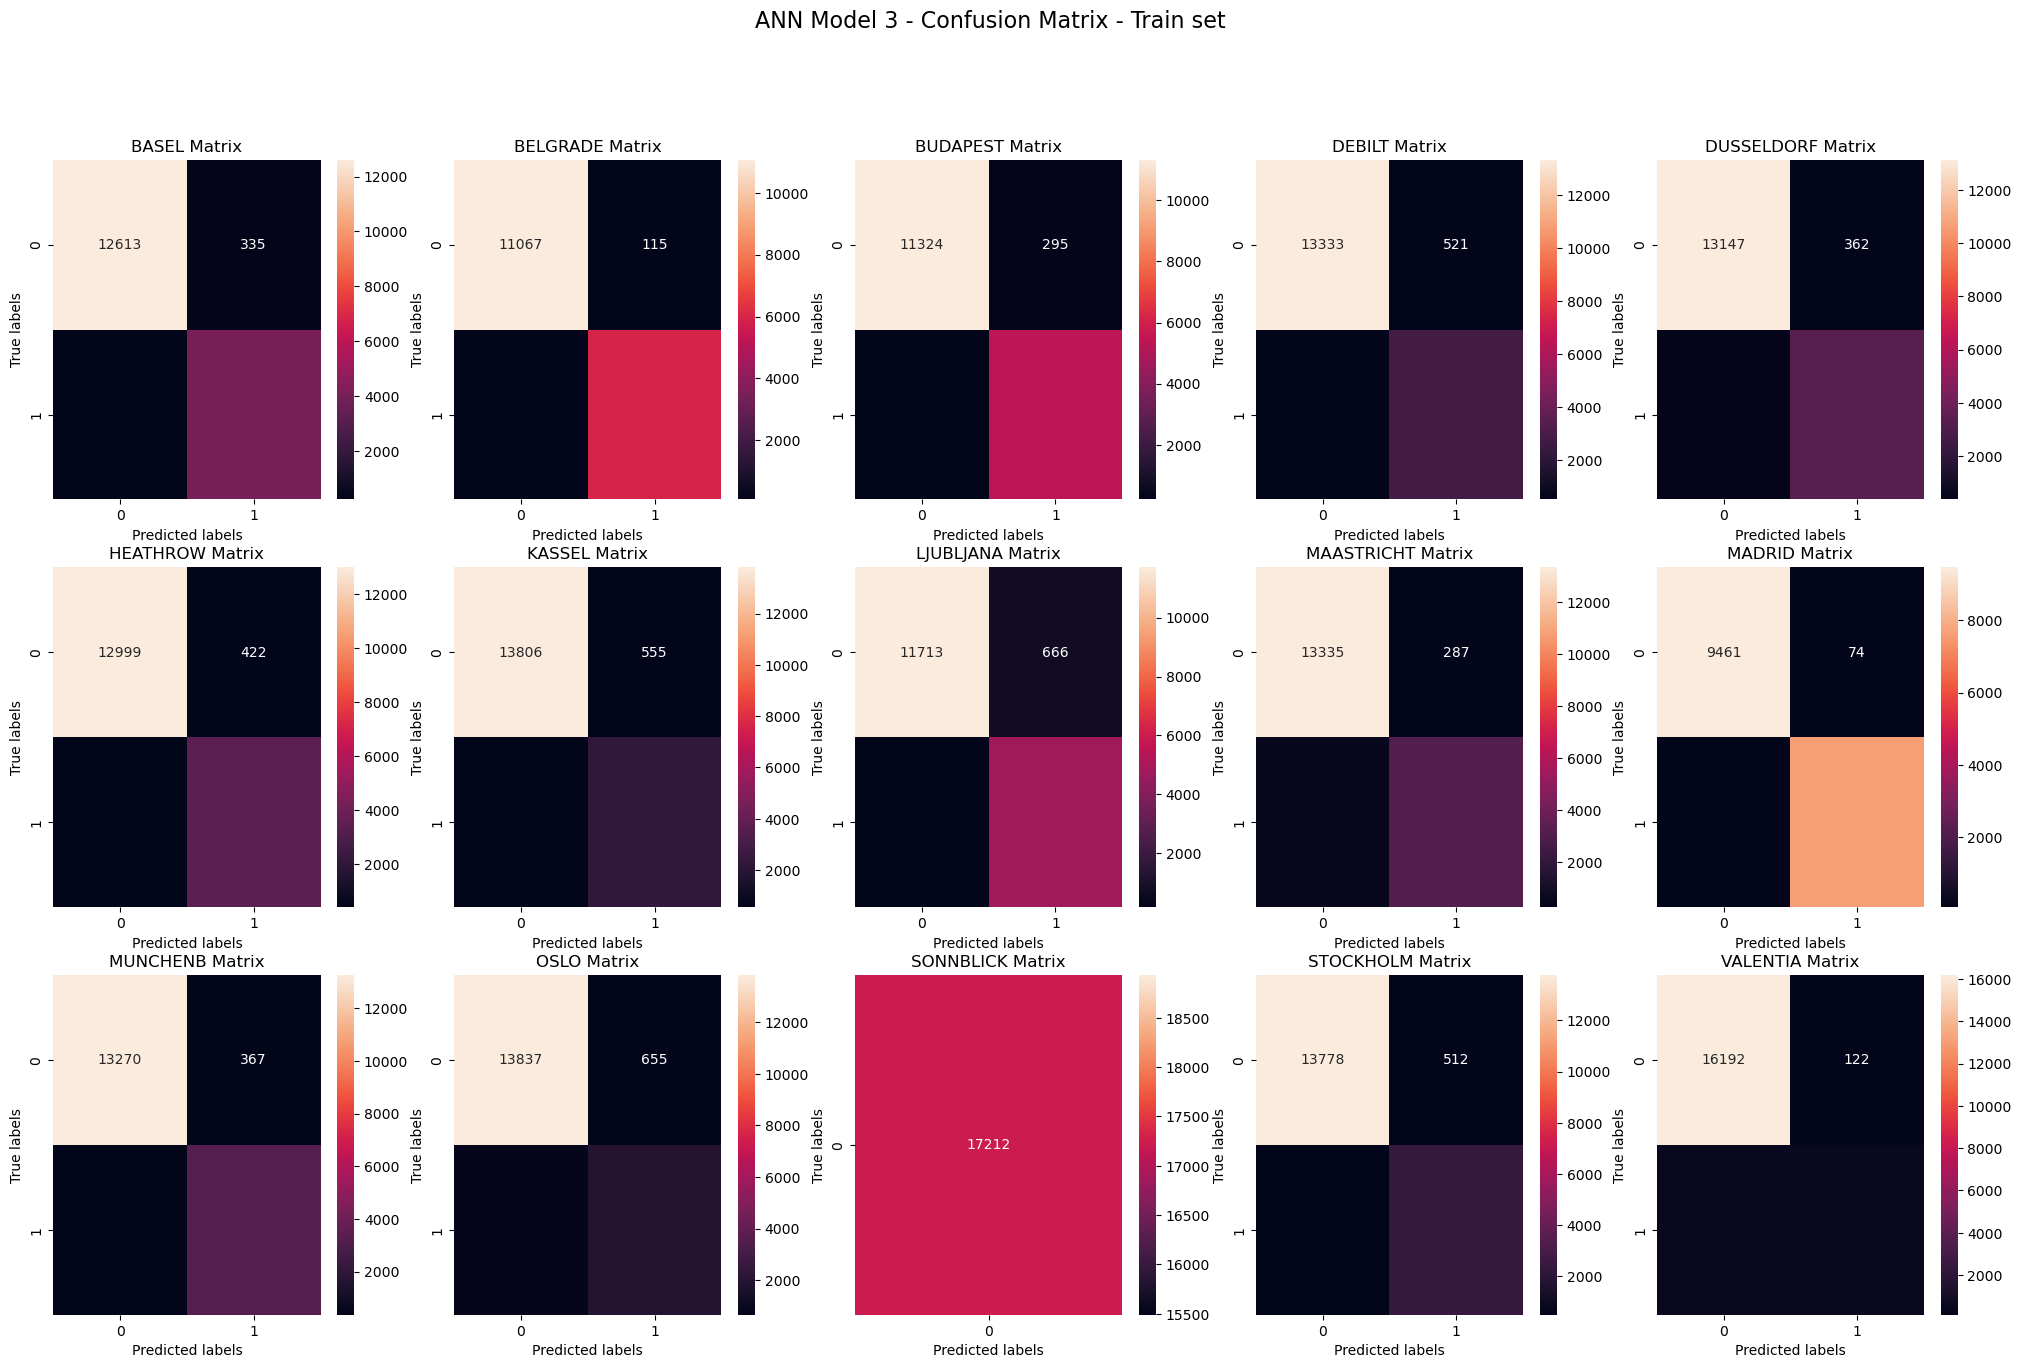

In [41]:
# Plot Confusion Matrices for Train Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']  
figure.suptitle('ANN Model 3 - Confusion Matrix - Train set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

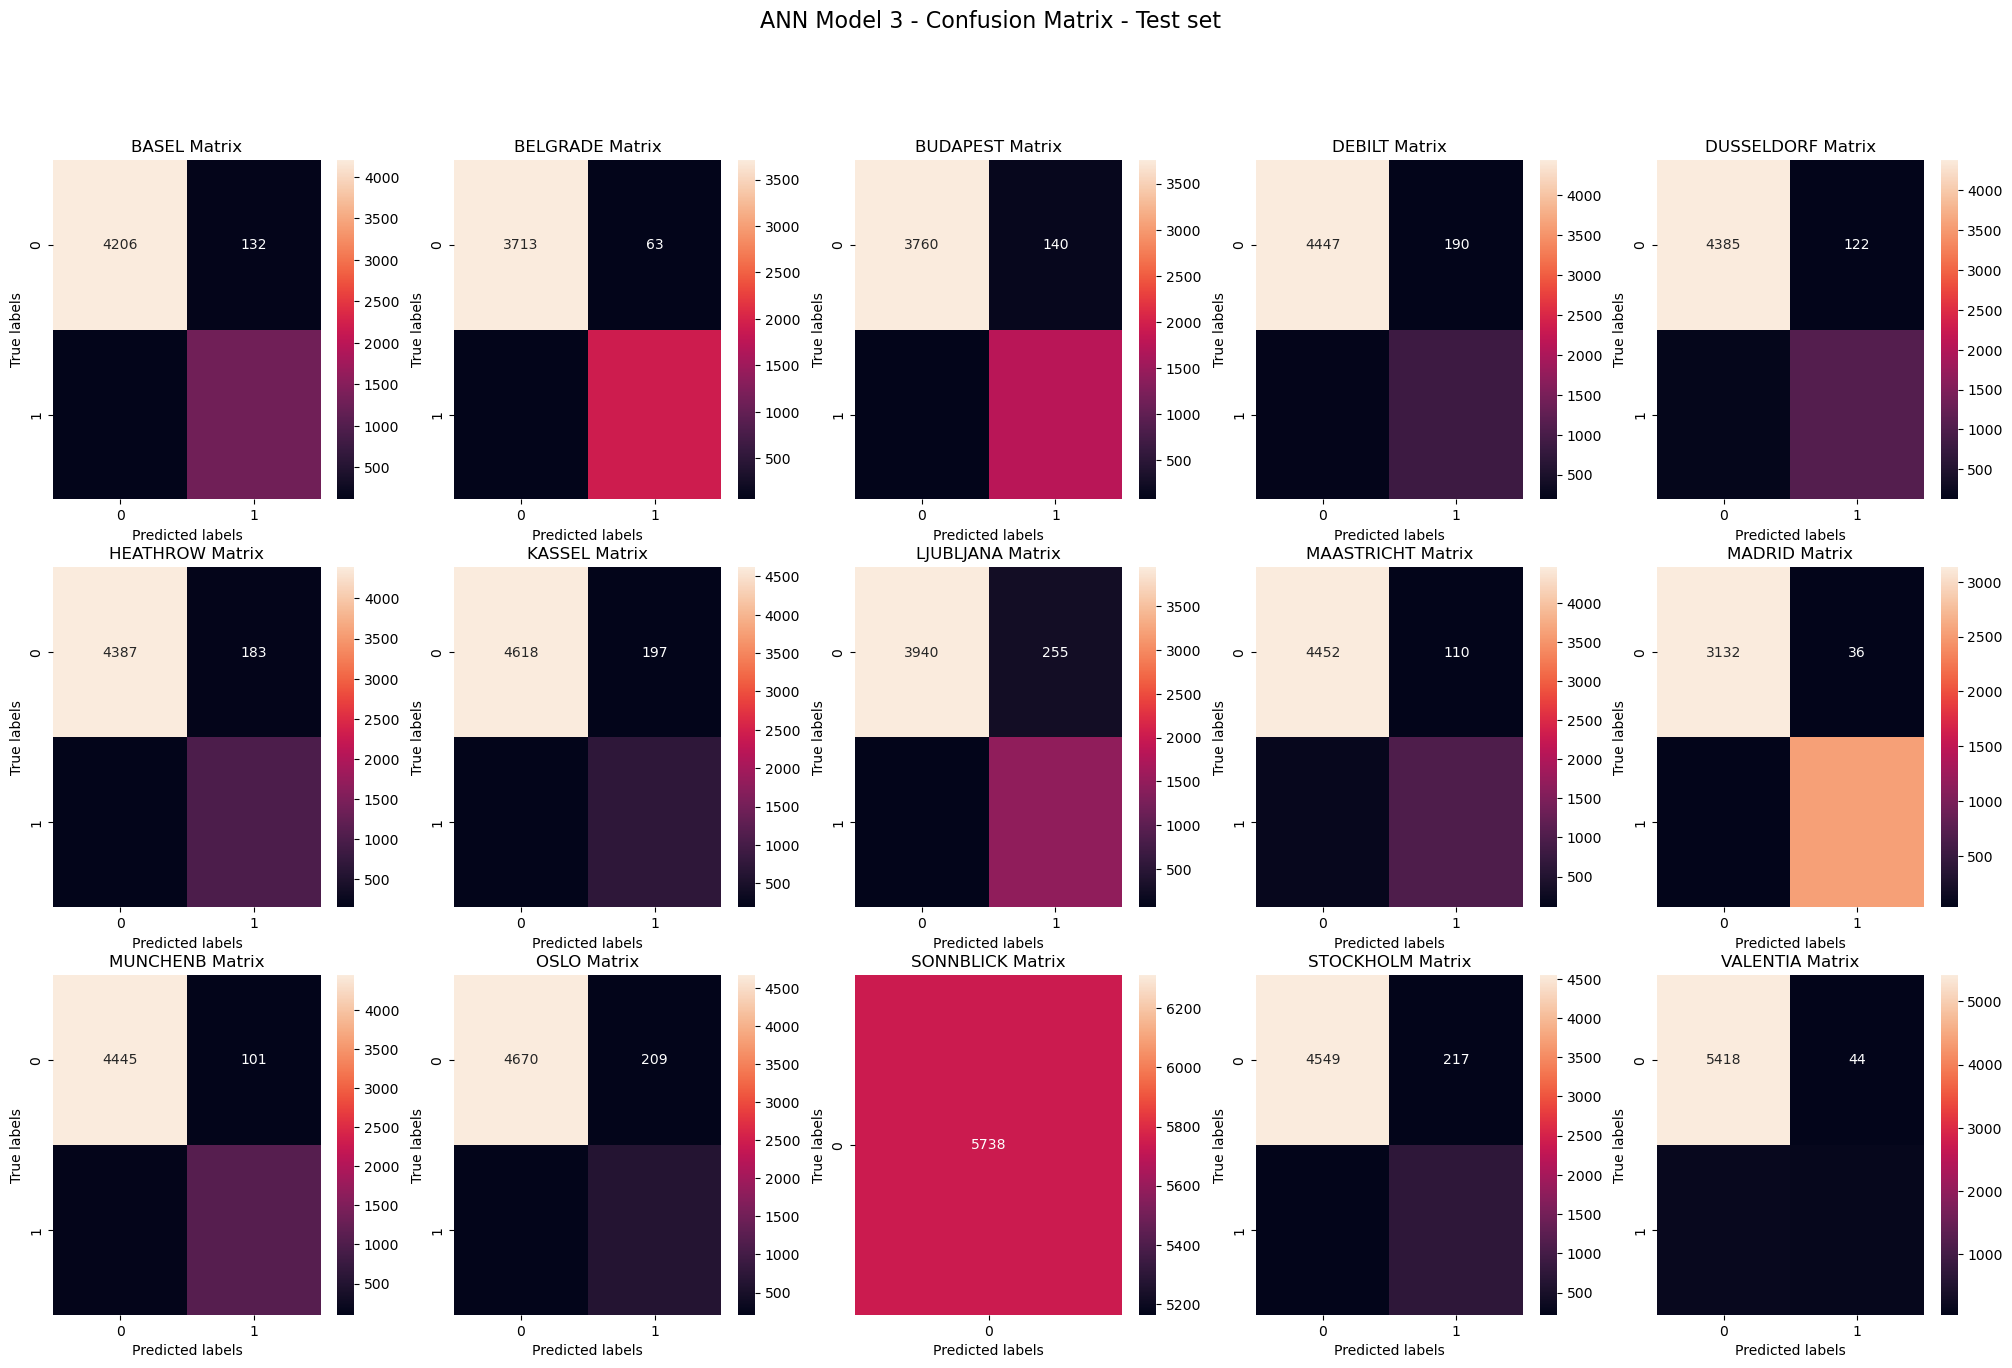

In [42]:
# Plot Confusion Matrices for Test Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant'] 
figure.suptitle('ANN Model 3 - Confusion Matrix - Test set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 4.4 ANN Model 4

In [43]:
# Create the ANN with three hidden layers (200,100,100)
mlp = MLPClassifier(hidden_layer_sizes=(200, 100, 100), max_iter=1000, tol=0.0001) #Increase nodes
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 100), max_iter=1000)

In [44]:
# Accuracy score
y_pred = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.938182663258192
Test accuracy score  0.5576856047403277


In [45]:
location_accuracies = {}
for count, location in enumerate(locations):
    key = f"{location}_pleasant_weather"
    loc_accuracy = accuracy_score(y_test[key], y_pred_test[:, count])
    location_accuracies[location] = loc_accuracy
    print(f'Accuracy for {location}: {loc_accuracy}')

Accuracy for BASEL: 0.9414430115022656
Accuracy for BELGRADE: 0.9301150226559777
Accuracy for BUDAPEST: 0.9403973509933775
Accuracy for DEBILT: 0.936214708957825
Accuracy for DUSSELDORF: 0.9409201812478215
Accuracy for HEATHROW: 0.9360404322063437
Accuracy for KASSEL: 0.955036598117811
Accuracy for LJUBLJANA: 0.9217497385848727
Accuracy for MAASTRICHT: 0.9374346462181945
Accuracy for MADRID: 0.9437086092715232
Accuracy for MUNCHENB: 0.9423143952596723
Accuracy for OSLO: 0.942662948762635
Accuracy for SONNBLICK: 1.0
Accuracy for STOCKHOLM: 0.9341233879400488
Accuracy for VALENTIA: 0.9710700592540955


#### There's significant increase in the accuracy of train set, which may indicate larger nodes may lead to better result.

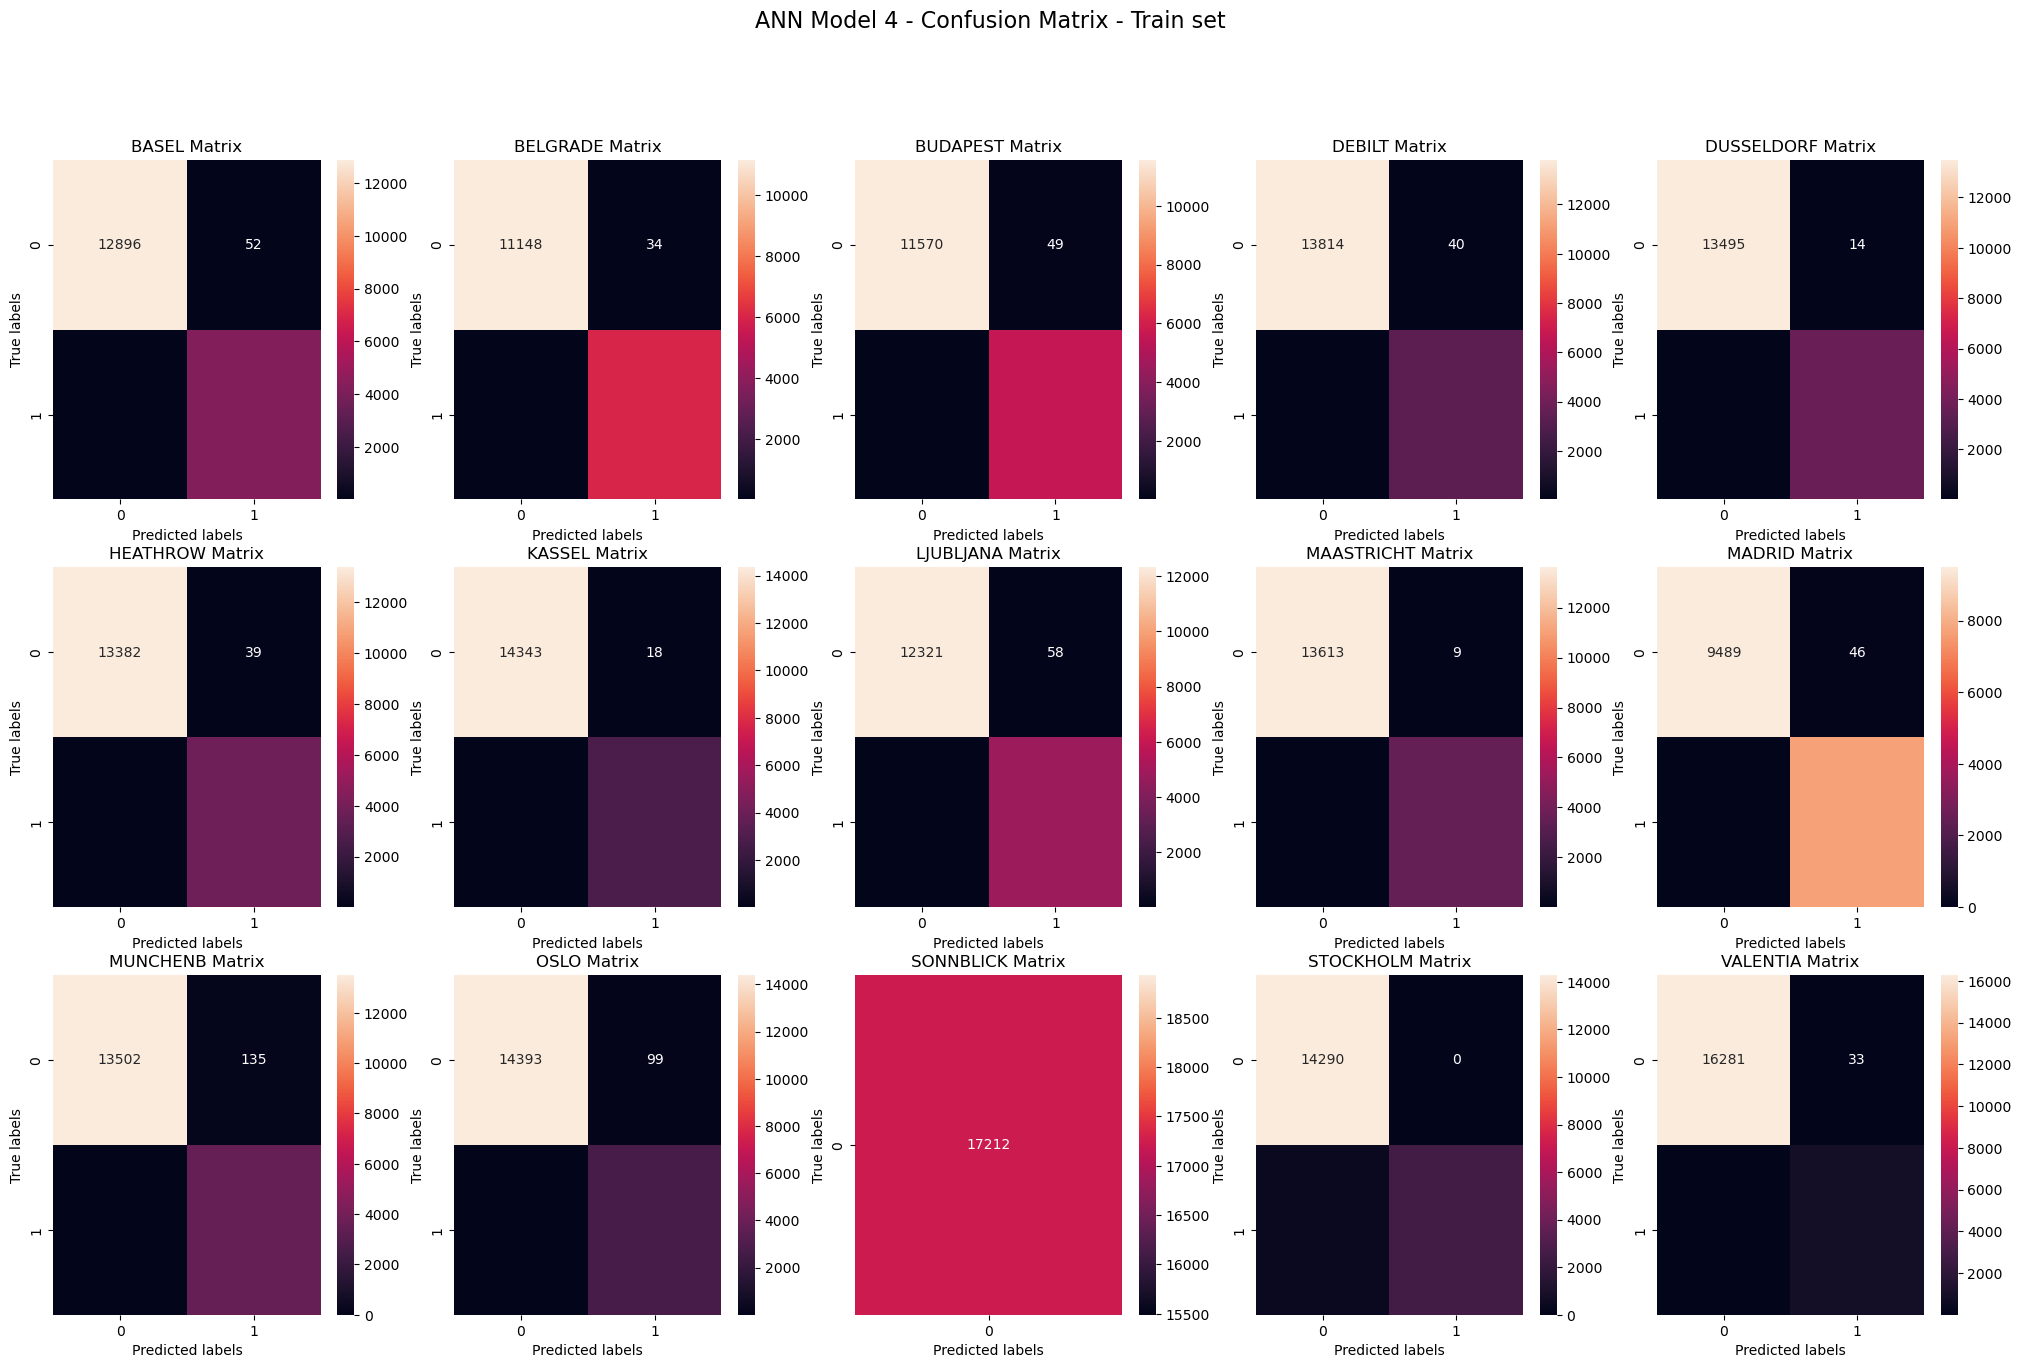

In [46]:
# Plot Confusion Matrices for Train Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']  
figure.suptitle('ANN Model 4 - Confusion Matrix - Train set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

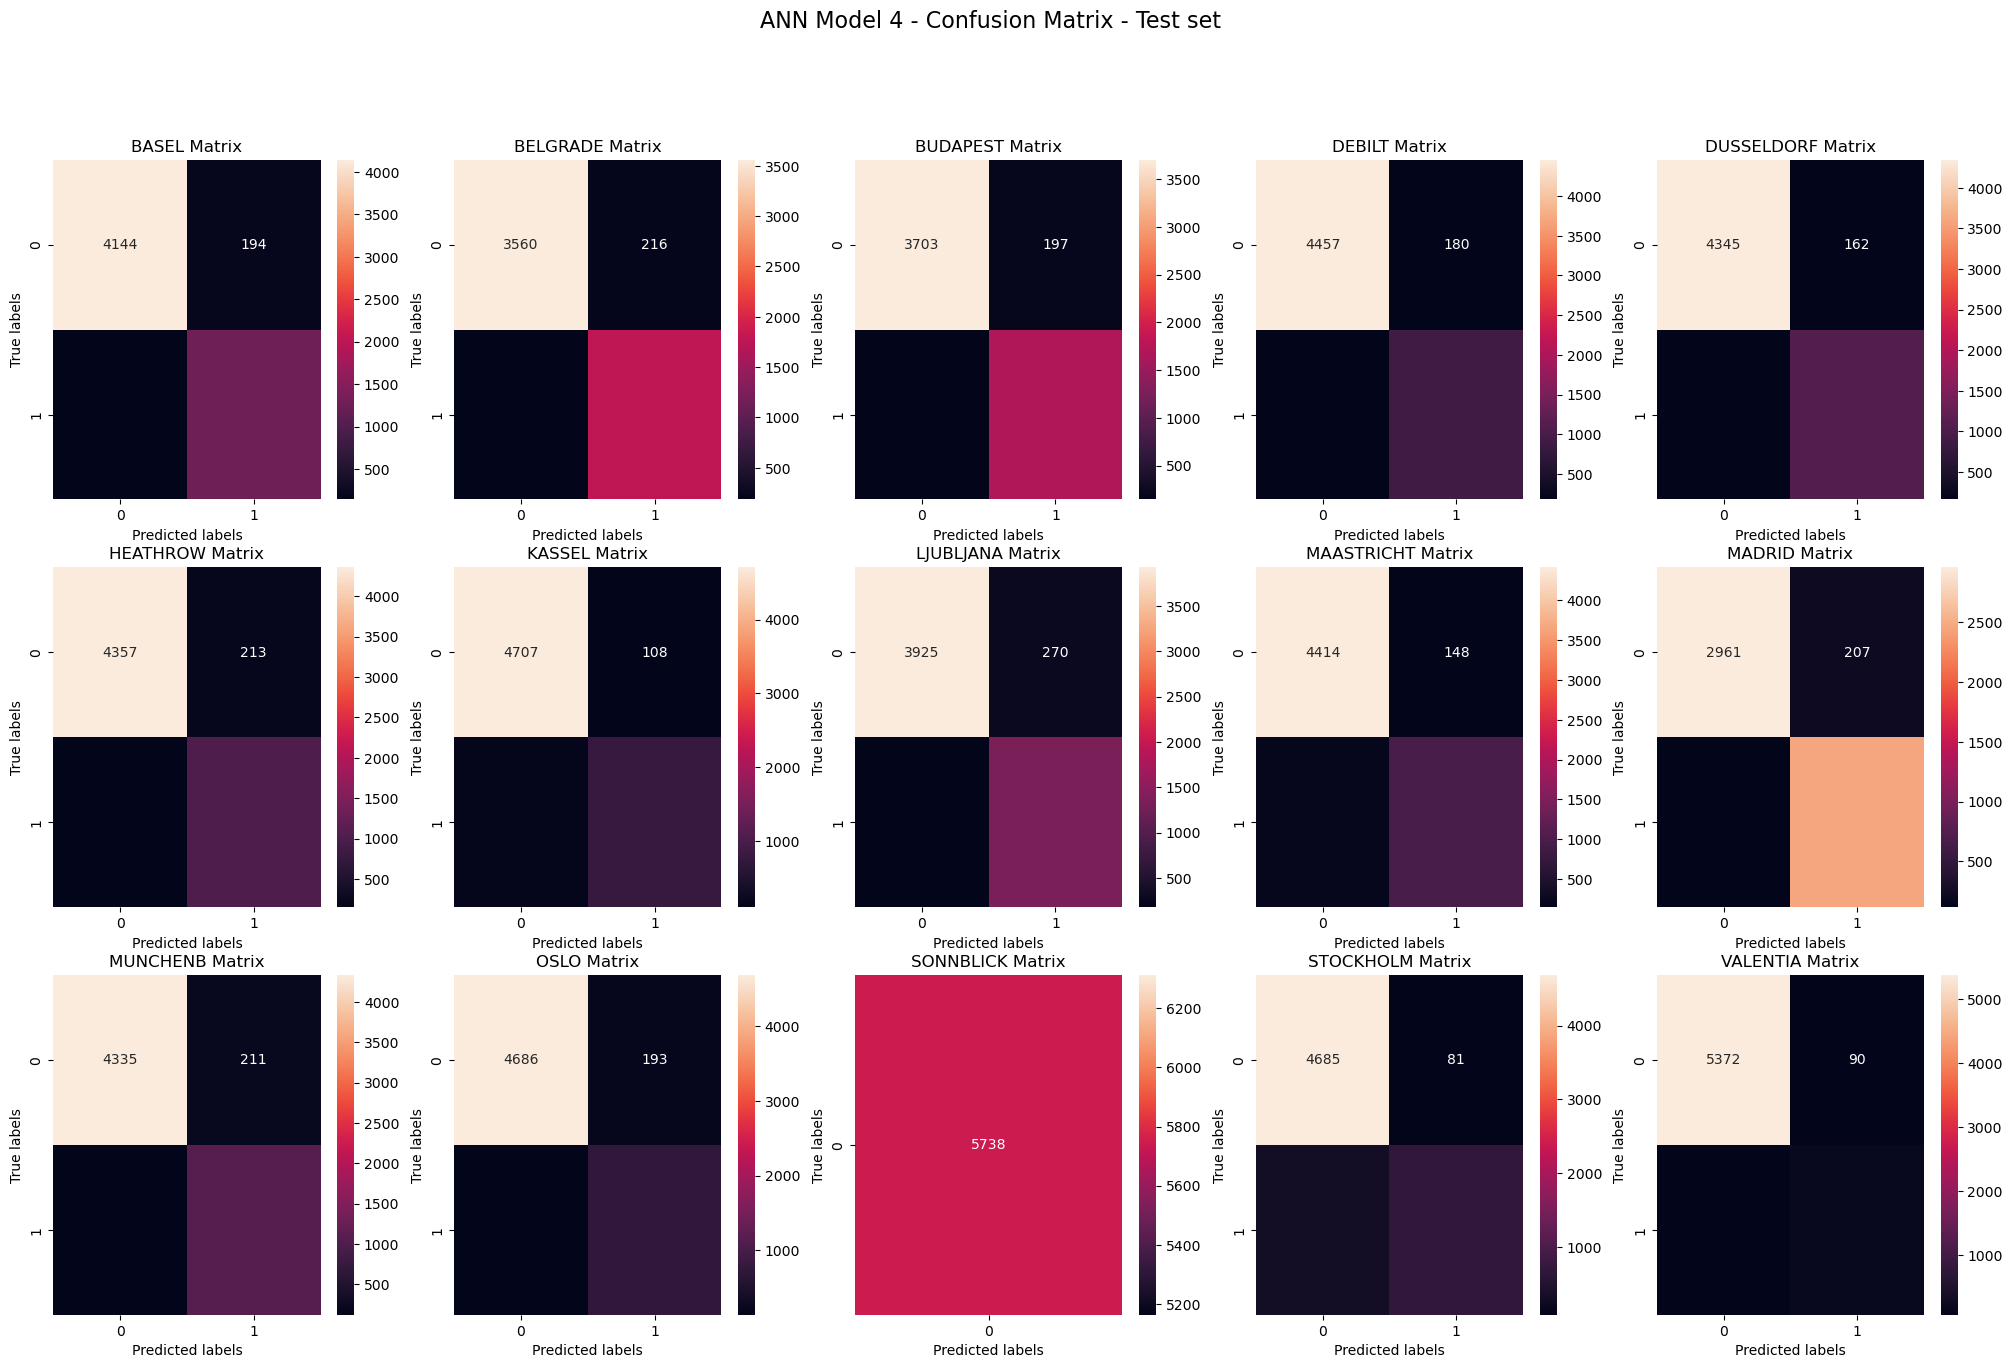

In [47]:
# Plot Confusion Matrices for Test Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant'] 
figure.suptitle('ANN Model 4 - Confusion Matrix - Test set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### 4.5 ANN Model 5

In [48]:
# Create the ANN with three hidden layers (300,200,100)
mlp = MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=1000, tol=0.0001) #Increase nodes
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=1000)

In [49]:
# Accuracy score
y_pred = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.9982570299790844
Test accuracy score  0.5559428372255141


In [50]:
location_accuracies = {}
for count, location in enumerate(locations):
    key = f"{location}_pleasant_weather"
    loc_accuracy = accuracy_score(y_test[key], y_pred_test[:, count])
    location_accuracies[location] = loc_accuracy
    print(f'Accuracy for {location}: {loc_accuracy}')

Accuracy for BASEL: 0.9349947716974556
Accuracy for BELGRADE: 0.9306378529104218
Accuracy for BUDAPEST: 0.9360404322063437
Accuracy for DEBILT: 0.9341233879400488
Accuracy for DUSSELDORF: 0.942662948762635
Accuracy for HEATHROW: 0.9322063436737539
Accuracy for KASSEL: 0.9461484837922621
Accuracy for LJUBLJANA: 0.9295921924015337
Accuracy for MAASTRICHT: 0.9410944579993029
Accuracy for MADRID: 0.9468455907981875
Accuracy for MUNCHENB: 0.9384803067270826
Accuracy for OSLO: 0.9442314395259672
Accuracy for SONNBLICK: 1.0
Accuracy for STOCKHOLM: 0.9435343325200418
Accuracy for VALENTIA: 0.9689787382363193


#### Better accuracy for training set, but accuracy for test set decreases

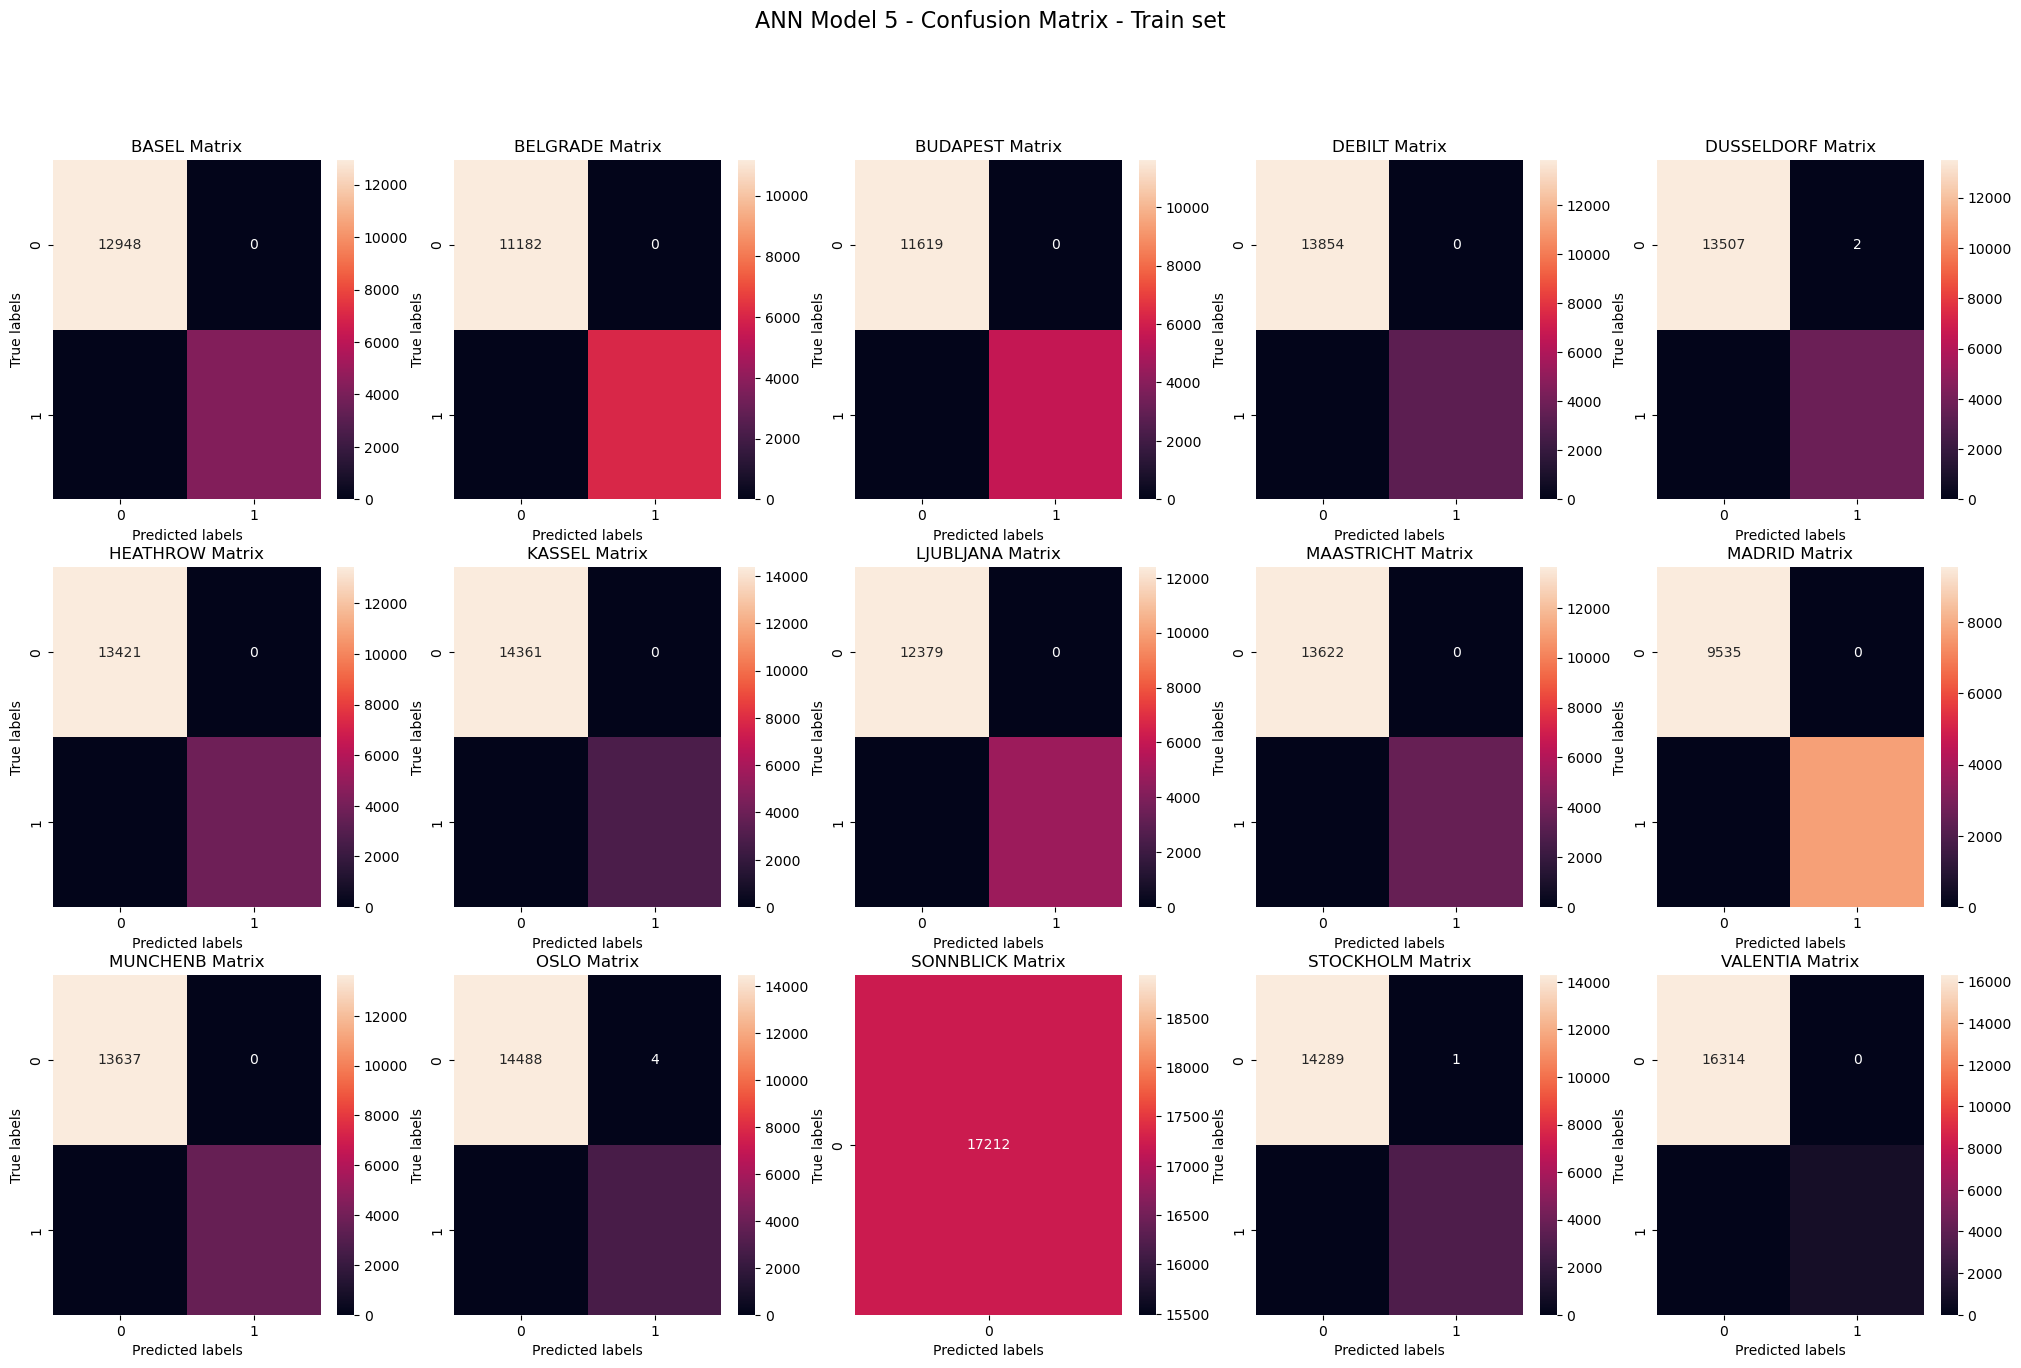

In [51]:
# Plot Confusion Matrices for Train Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']  
figure.suptitle('ANN Model 5 - Confusion Matrix - Train set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

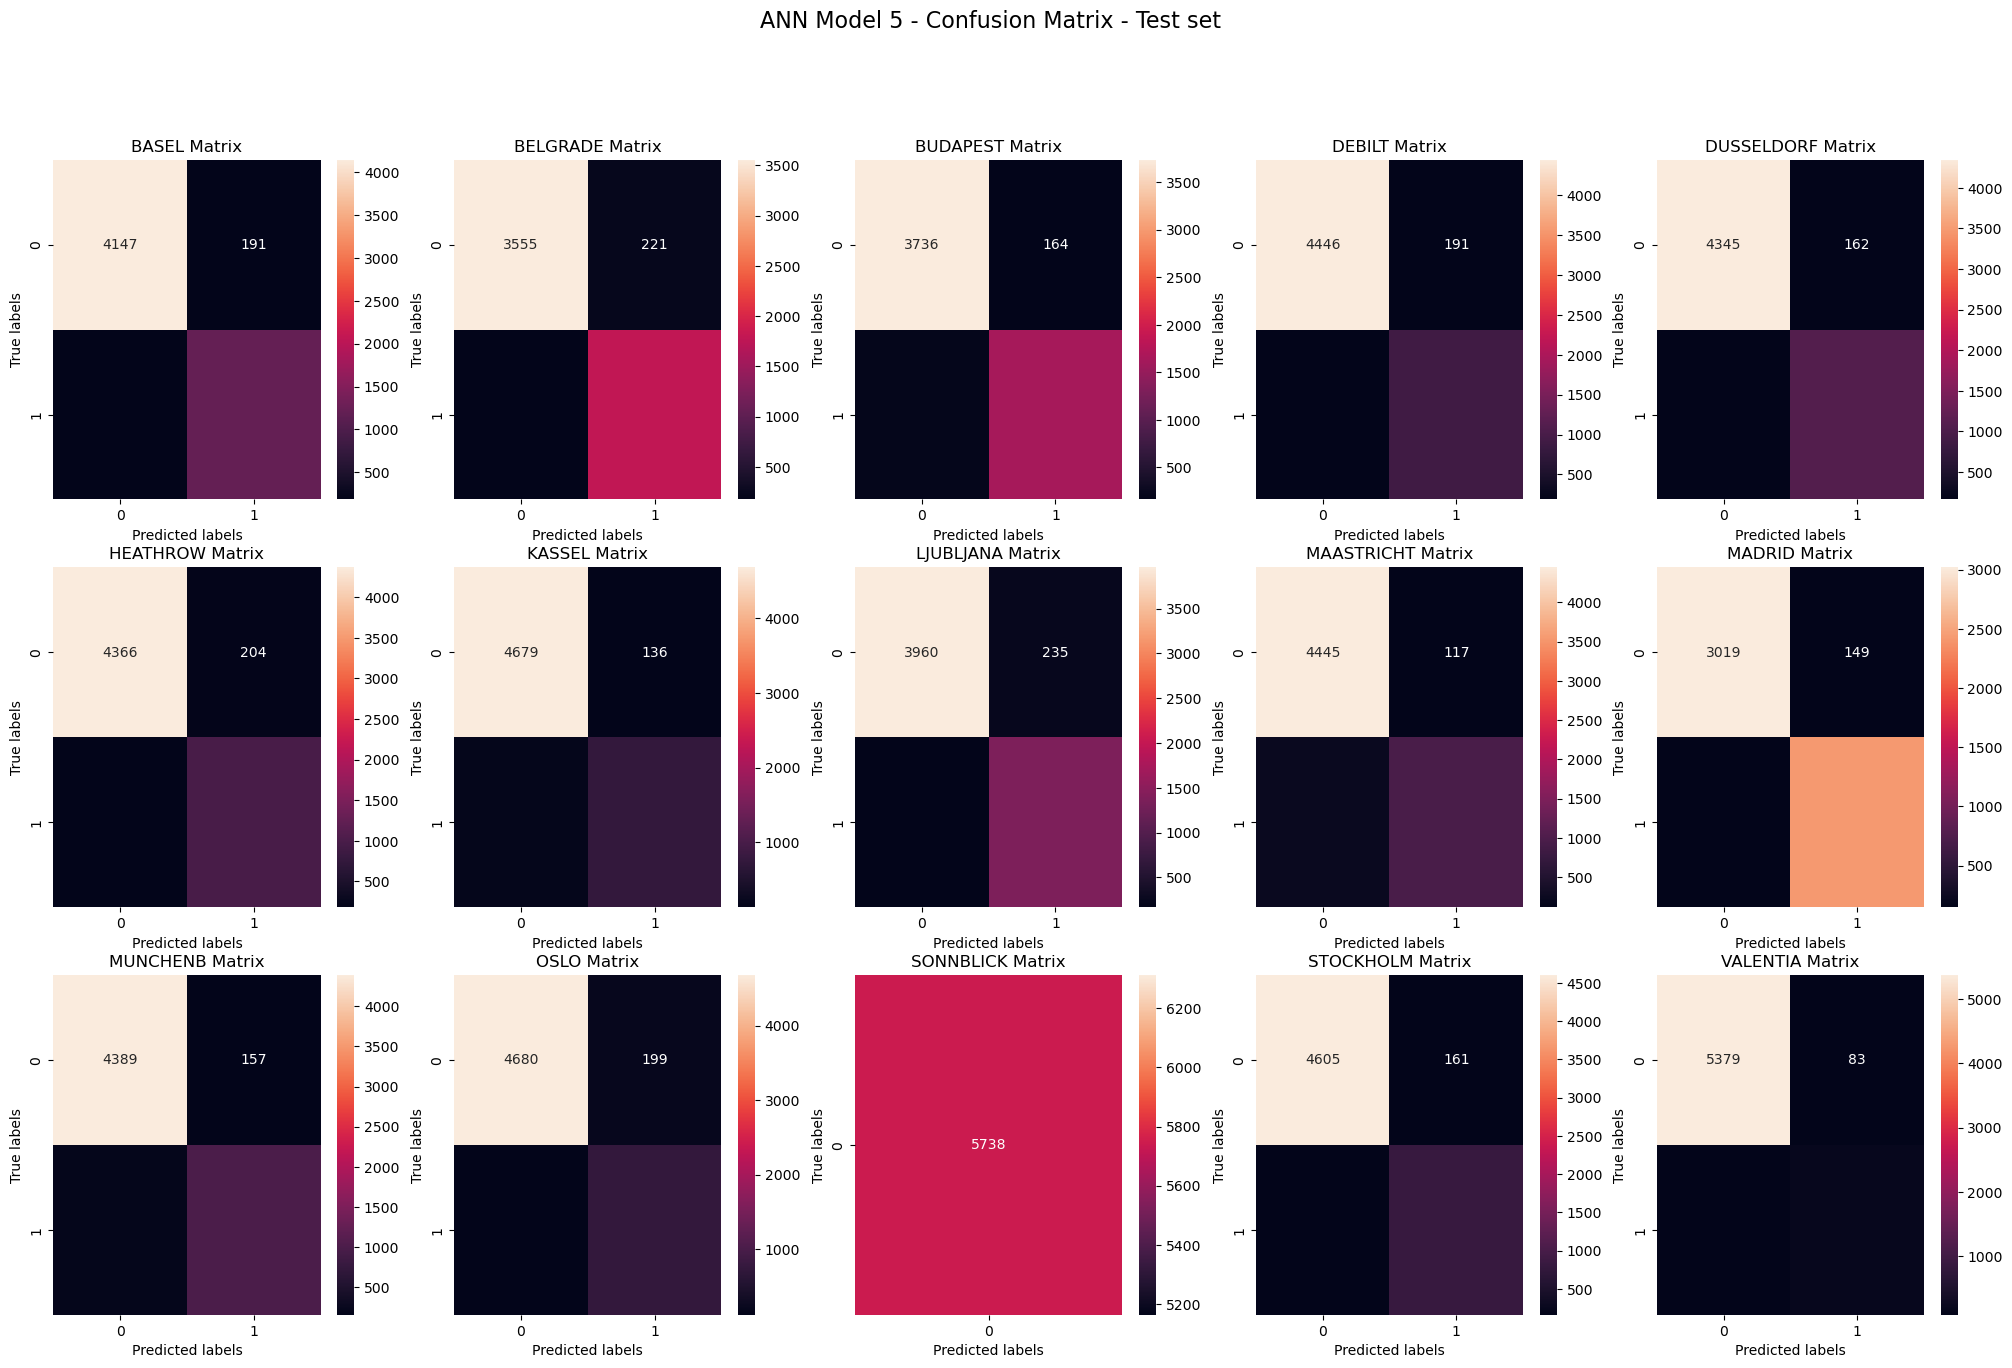

In [52]:
# Plot Confusion Matrices for Test Set
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant'] 
figure.suptitle('ANN Model 5 - Confusion Matrix - Test set', fontsize=16)
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [53]:
# Create the ANN with three hidden layers (300,200,200)
mlp = MLPClassifier(hidden_layer_sizes=(300, 200, 200), max_iter=1000, tol=0.0001) #Increase nodes to check if there is any better combination
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 200, 200), max_iter=1000)

In [54]:
# Accuracy score
y_pred = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.9984894259818731
Test accuracy score  0.5594283722551412


#### Increasing the nodes does not show any change in accuarcy score of the test set. That means (300, 200, 100) is the best combination of the ANN model. However, it still results any low accuracy score for test set compared to other intial tries. 

### Final Summary & Comparison among models:
#### KNN Model: Training Accuracy: 56.8%. Test Accuracy: 44.7%. This model has relatively low accuracy on both the training and test sets, suggesting it is slightly underfitting. Underfitting occurs when the model is too simple to capture the underlying patterns in the data.

#### ANN Model: Training Accuracy: 99.8%. Test Accuracy: 55.6%. This model has a very high training accuracy but a significantly lower test accuracy, indicating that it is likely overfitting the training data. Overfitting occurs when the model learns the training data too well, including noise and outliers, but fails to generalize to unseen data (the test set).

#### Decision Tree Model: Training Accuracy: 60.35%. Test Accuracy: 63.56%. This model has moderately consistent training and test accuracy scores, with the test accuracy being slightly higher than the training accuracy. This suggests that the model is neither overfitting nor underfitting and is likely generalizing well to new data.

#### The decision tree model is the best among the three models because it has the highest test accuracy and its performance is consistent between the training and test sets. The fact that the test accuracy is slightly higher than the training accuracy might be due to slight variations in data or the model benefiting from certain aspects of the test data, but overall, it indicates good generalization.

#### The SONNBLICK station always has a 100% accuracy score for both training and test set, this indicates that due to its unvaried data, the models have nothing to learn from and always cause overfitting, thereby inflating the overall accuracy.

#### There are some features may affect the overall accuracy: the relationship between variables: this is thefeature we haven't analyze in our dataset and it may contribute to the overall accuracy. Data quality is the first thing we notice in our pleasant day dataset, in which we have 1 station with consistent pleasant day in over 60 years and we already saw how it affects our model. The general trend in increasing avarage temperature may also affect the overall result of our models.

#### In conclusion, I think decision tree still is the most suitable option for ClimateWins at the moment.